In [158]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

import random


givenPoints = np.array ( 
    [[-171.60,4.00,0.00],
[-206.40,4.20,0.00],
[-255.90,0.20,0.00],
[-272.10,-43.90,0.00],
[-205.50,-95.00,0.00],
[-185.50,-142.40,0.00],
[-152.10,-155.00,0.00],
[-101.40,-154.70,0.00],
[-42.80,-117.20,0.00],
[-39.80,-56.80,0.00],#10
[-40.90,-17.10,0.00],
[3.00,-5.70,0.00],
[47.80,-5.80,0.00],
[89.00,-5.50,0.00],
[45.90,-84.90,0.00],#15
[35.30,19.30,0.00],
[36.30,71.20,0.00],
[41.60,155.10,0.00],
[74.00,185.20,0.00],
[148.10,170.30,0.00],#20
[189.20,52.80,0.00],
[174.40,-148.00,0.00],
[10.20,-187.90,0.00],
[-145.80,-190.90,8.60],
[-222.60,35.10,10.00],#25
[-119.40,186.60,10.00],
[84.70,148.10,0.00],
[151.10,116.20,0.00],
[151.40,32.20,0.00],
[124.70,6.90,0.00],#30
[96.20,-28.60,0.00],
[-9.50,-88.30,0.00],
[-83.20,-87.70,0.00],
[-124.30,-42.40,0.00],
[-118.80,31.10,0.00],#35
[-124.40,102.30,0.00],
[-80.20,136.30,0.00],
[-16.70,87.93,0.00],
[25.70,65.40,0.00],
[24.60,-30.70,0.00]
])
edges = np.array([[1,104], 
[104, 2],
[85,1],
[82,85],
[71,82],
[81,71],
[195,41],
[41,81],
[45,195],
[46,45],
[50,46],
[30,50],
[154,30],
[53,55],
[55,58],
[58,38],
[38,62],
[62,65],
[65,120],
[120,123],
[123,113],
[113,115],
[115,175],
[143,15],
[15,136],
[136,32],
[32,76],
[76,79],
[79,33],
[33,92],
[92,95],
[95,101],
[101,102],
[102,173],
[179, 191],
[191, 190],
[190, 181],
[22, 202],
[202, 23],
[23, 24],
[24, 185],
[204,128],
[128, 124],
[124, 198],
[193, 168], 
[168, 166],
[166, 194],
[151, 149],
[27,161],
[159, 27],
[28, 159],
[155,28],
[161,18],
[18, 172],
[2,177],
[199, 125],
[125, 129],
[129, 37],
[176,116],
[116,114],
[114,122],
[122, 121],
[121, 66],
[66, 61],
[61, 60],
[60, 59],
[59, 54],
[54, 52],
[178,105],
[105, 106],
[106, 84],
[84, 83],
[83, 72],
[72, 80],
[80, 12],
[12,196],
[196, 13],
[13, 14],
[14, 49],
[49,153],
[174,5],
[5, 103],
[103, 100],
[100,94],
[94, 93],
[93, 78],
[78, 77],
[77, 137],
[137,138],
[138, 144],
[6,7],
[7, 167],
[167, 169],
[169, 8],
[8, 9],
[150 ,152],
[180,26],
[26, 189],
[189, 192],
[192, 19],
[19, 20],
[186,182],
[182,184],
[184,203],
[203, 183],
[189,187],
[125,126],
[122,119],
[66,67],
[59,39],
[116,111],
[105,170],
[84,89],
[72,73],
[196,43],
[14,31],
[153,156],
[103,132],
[94,96],
[78,134],
[137,141],
[113, 109], 
[120, 117],
[62,64],
[55,57],
[1,108],
[177,207],
[82,87],
[81,69],
[45,16],
[50,48],
[173,197],
[101,130],
[92,91],
[76,75],
[15,139],
[168,98],
[149,148],
[202,201],
[164,160],
[160,158],
[197, 206],
[206, 3],
[3, 207],
[207,176],
[175, 208],
[208, 205],
[205,4],
[4,174],
[206,178],
[185, 25],
[25, 180],
[181, 186],
[109, 199],
[198,110],
[108,112],
[111,107],
[107,170],
[170, 131],
[131,132],
[132, 6],
[194,133],
[133,130],
[110, 115],
[107, 104],
[131, 102],
[133, 100],
[171, 106],
[112,114],
[130, 171],
[171, 108],
[112, 109],
[98, 97],
[97, 91],
[97, 93],
[91, 88],
[126, 36],
[36, 123],
[36, 119],
[119, 86],
[86, 85],
[86, 89],
[89, 34],
[34, 90],
[90, 95],
[90, 96],
[96, 99],
[99, 166],
[88, 83],
[88, 87],
[87, 35],
[35, 118],
[118, 121],
[118, 117],
[117, 127],
[127, 129],
[9,135],
[135, 77],
[135, 75],
[75, 10],
[10, 11],
[11, 80],
[11, 69],
[69, 68],
[68, 61],
[68, 64],
[64, 204],
[37, 63],
[63, 65],
[63, 67],
[67, 70],
[70, 71],
[70, 73],
[73, 74],
[74, 79],
[74, 134],
[134,193],
[187,162],
[162, 163],
[163, 165],
[165, 56],
[56, 58],
[56, 39],
[39, 42],
[42, 195],
[42, 43],
[43, 40],
[40, 140],
[140, 136],
[140, 141],
[141, 145],
[145, 147],
[147, 200],
[200, 23],
[201,146],
[146, 150],
[146, 148],
[148, 142],
[142, 138],
[142, 139],
[139, 44],
[44, 13],
[44,16],
[16, 17],
[17, 54],
[17, 57],
[57, 164],
[164, 18],
[18, 172],
[172, 188],
[188, 192],
[144,49],
[49, 48],
[48, 53],
[52,47],
[47, 46],
[47,31],
[31, 143],
[156,151],
[152,157],
[157,155],
[158, 29],
[110, 111],
[29, 154],
[29, 156],
[20,21],
[21,22],
[183, 179],
[191, 192],
[189, 190],
[202, 203],
[184, 23],


[112,115],
[116, 109],
[110, 114], 
[113, 111],

[171, 104],
[105, 108],
[1, 170],
[107, 106],


[133, 102],
[103,130],
[101,132],
[131,100],

[36,121],
[120,119],
[118,123],
[122,117],

[86, 83],
[82, 89],
[88, 85],
[84, 87],

[97, 95],
[94,91],
[90, 93],
[92, 96],

[62, 67],
[66, 64],
[68, 65],
[63, 61],

[70, 80],
[81, 73],
[72, 69],
[11, 71],

[59, 57],
[55, 39],
[17, 58],
[56, 54],




[135,79],
[78, 75],
[74, 77],
[76, 134],


[142, 136],
[140, 138],
[137, 139],
[15, 141],




[196, 16],
[45, 43],
[44, 195],
[42, 13],

[49, 46],
[47, 49],
[48, 31],
[14, 50],


[128, 126],
[127, 124],


[162, 160],
[161, 163],

[149, 147],
[145, 150],

[99, 169],
[167, 98],

[153, 155],
[157, 154],

[200, 203],
[184, 201],


[191, 187],
[188, 190],

[208, 178],
[177, 205],
])





intersections = np.load("intersections.npy")

36, 13, 27, 15, 23, 25, 34,  2,  4,  8, 11, 12, 16 ,18, 20
toggle = {
    "36" : 117,
    "117" :36,


    "13" :45 ,
    "45" :13 ,


    "27" : 160,
    "160" :27 ,



    "15" : 138,
    "138" :15 ,



    "23" : 184,
    "184" :23 ,



    "25" : 186,
    "186" :25 ,



    "34" : 91,
    "91" :34 ,



    "2" : 105,
    "105" :2 ,



    "4" : 197,
    "197" :4 ,



    "8" : 168,
    "168" :8 ,


    "11" : 73,
    "73" :11 ,

    "12" : 81,
    "81" :12 ,



    "16" : 42,
    "42" :16 ,


    "18" :162 ,
    "162" :18 ,

    "20" : 179,
    "179" :20 ,
    

}
#np.save("v5.npy",np.array(intersections))

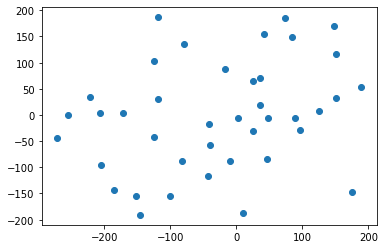

In [159]:
y = givenPoints[:,0:2]


plt.scatter(y[:,0],y[:,1])
plt.show()

In [160]:
def traslate(point,a=1.45,b=399,c =-1.44 ,d =308, scale  = 2):
    x,y = point
    return 2*int (a*x+b) ,  2*int (c*y+d)

In [161]:
def get_point(s):
    s-=1
    if (s>39):
        point = (intersections[s-40][0],intersections[s-40][1])
    else:
        point = (givenPoints[s][0],givenPoints[s][1])
        
    return point
get_point(42)

(27.0, 18.0)

True

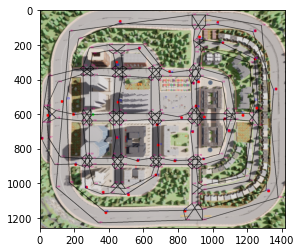

In [162]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 1


img = cv2.imread("img.png")
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)


def plotImg(mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True, Path = np.array([]), splitPath = False):
    img = cv2.imread("img.png")


    
    
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    c = 1

    for x,y,_ in givenPoints:
        x,y = traslate(point=(x,y))

        bottomLeftCornerOfText = (x,y)
        
        if mainPointsText == True:
            cv2.putText(img, str(c), bottomLeftCornerOfText, font,fontScale,fontColor,thickness, lineType)
        
        if mainPointsCircles == True:
            img = cv2.circle(img, (x, y), 3, (00,255,255), 2)
        c+=1




    imgcopy = img
    if showEdges == True:
        for s,d in edges:    
            cv2.line(imgcopy, traslate(point= get_point(s)), traslate(point= get_point(d)), (0,0,0), 2)
        
    for x,y in intersections:
        x,y = traslate(point= (x, y))

        bottomLeftCornerOfText = (x,y)
        

        if interPointsCircles == True:
            cv2.circle(imgcopy, (x, y), 3, (00,255,255), 2)
        
        if interPointsText == True:
            cv2.putText(imgcopy, str(c), bottomLeftCornerOfText, font,fontScale*0.8,(120,0,200),thickness, lineType)
        
        c+=1
        
                
    if Path.shape[0]> 0 :
        n = Path.shape[0]
        c = 1

        if splitPath == True:
            step = 15
            
        else :
            step = n
            
        temp = imgcopy
        imgC = 1
        
        for j in range(-1, n, step):
            if splitPath == True: 
                imgcopy = np.array(temp)
            for i in range (j,min (j+step, n),1):
                if (i==-1):
                    s=1
                    d= int (Path[i+1])
                elif i==n-1:
                    s =  int (Path[i])
                    d = int (1)
                else:
                    s =  int (Path[i])
                    d = int (Path[i+1])

                sx, sy = traslate(point= get_point(s))
                dx, dy = traslate(point= get_point(d))
                
                center = (int ((sx+dx)/2) , int ((sy+dy)/2))
                cv2.putText(imgcopy, str(c), center, font,fontScale,(0,0,0),thickness*2, lineType)


                cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
                c+=1

            if splitPath == True:
                cv2.imwrite('pathes//path' + str(imgC) + '.png', imgcopy)
            imgC+=1

    return imgcopy



img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True)
plt.imshow(img[:,:,::-1])
cv2.imwrite('out.png', img)
    

In [163]:
graphList = {}


for s, d in edges:
    
    dis = math.dist(get_point(s),get_point(d))
    if str(s) in graphList and  str(d) in graphList:
        graphList[str(s)].append((d,dis))
        #graphList[str(d)].append((s,dis))
        
    elif str(s) in graphList:
        graphList[str(s)].append((d,dis))
       # graphList[str(d)] = [(s,dis)]
    elif str(d) in graphList: 
       # graphList[str(d)].append((s,dis))
        graphList[str(s)] = [(d,dis)]     
    else:
        graphList[str(s)] = [(d,dis)]
      #  graphList[str(d)] = [(s,dis)]   
        
print( (graphList["2"]))            
    

[(177, 37.42191871083042)]


In [164]:
TotalNodeCount = givenPoints.shape[0] + intersections.shape[0]

graphMarix = np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=float)
graphMarix = graphMarix * float('inf')

for s, d in edges:
    dis = math.dist(get_point(s),get_point(d))
    
    graphMarix[s][d] = dis
    #graphMarix[d][s] = dis

np.fill_diagonal(graphMarix,0)
graphMarix[0][0] = float('inf')


print(graphMarix[10][11])




39.71523637094459


In [165]:
dp = graphMarix

next =  np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=int)
next = next * -1

for j in range (1, TotalNodeCount+1):
    for i in range (1, TotalNodeCount+1):
        if (dp[j][i] != float('inf') ):
            next[j][i] = i 


In [166]:
for k in range (1, TotalNodeCount+1):
    for j in range (1, TotalNodeCount+1):
        for i in range (1, TotalNodeCount+1):
            if (dp[j][k]  + dp[k][i] < dp[j][i] ):
               dp[j][i] =  dp[j][k]  + dp[k][i]
               next[j][i] = next[j][k]      
                

In [167]:
def getPath(start, end, ans = None):
    if (ans == None):
        ans = [start]
    else:
        ans.append(start)

    if (start == end):
        return np.array (ans)
    start = next[start][end]
    return getPath(start, end,ans)

    
x = getPath(start = 2, end =5, ans = None)
print (next[2][5])

177


In [168]:
def getDensePath (Path):
    finalpath = getPath(1, Path[0], ans = None)

    n = Path.shape[0]

    for i in range (n-1):
        finalpath = np.concatenate( (finalpath, getPath( Path[i],Path[i+1], ans = None)), axis=None  )

    finalpath = np.concatenate( (finalpath, getPath( Path[n-1],1, ans = None)), axis=None  )     
    
    newfinalPath = np.array([], dtype=int)


    for i in range (finalpath.shape[0]):
        if (newfinalPath.shape[0] == 0 or finalpath[i]!= newfinalPath [ newfinalPath.shape[0] -1]):
            newfinalPath = np.insert(newfinalPath, newfinalPath.shape[0], finalpath[i])
    
    
    return newfinalPath
getDensePath(np.array([11]))

array([  1, 170, 131, 100,  94,  93,  78,  75,  10,  11,  71,  82,  85,
         1])

True

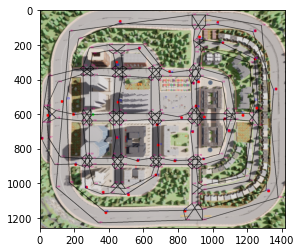

In [169]:
img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True)

plt.imshow(img[:,:,::-1])


In [170]:
def caclCostOrder (order):
    
    n = order.shape[0]
    ans = 0.0
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]
        
    
    
    return 1000.0/ans +0.0001

'''
def pelanty (prev, cur, nex):
    pathPrevCur = getPath(start = prev, end =cur, ans = None)
    
    p = dp[prev][cur] + dp[prev][cur]
    prev = pathPrevCur[pathPrevCur.shape[0]-2]
    nex = next[cur][nex]
    x0, y0 = get_point(prev)
    x1, y1 = get_point(cur)
    x2, y2 = get_point(nex)

    ans = 0.0

    
    if abs(y1- y0) < 20 and abs(y2 - y1) < 20 and (x1- x0) *(x2 - x1) < 0:
        ans+=p

    if abs(x1- x0) < 20 and abs(x2 - x1) < 20 and (y1- y0) *(y2 - y1) < 0:
        ans+=p
    return ans*'''

    
def caclCostOrderCircle(order):
    global gmin
    global gorder
    ans = 0.0

    n = order.shape[0]
    
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]

        '''if (i==0):
            ans += pelanty (1, order[i], order[i+1])
        elif (i==n-1):
            ans += pelanty (order[i-1], order[i], 1)
        else:
            ans += pelanty (order[i-1], order[i],order[i+1])'''

 
        
    ans+= dp[1][order[0]] + dp[1][order[n-1]] 
    
    
    if (ans < gmin):
        gorder= order
        gmin = ans


    return 1/ans


In [171]:
NofPop =  200



#SizeOfP = 40


gorder= np.array([  2,   4,   8, 138,  81, 117,  73,  91,  42,  23,  25,  27,18,  20])
#gorder =np.arange(2,SizeOfP+1)
SizeOfP = gorder.shape[0]+1
gmin = float('inf') 
#caclCostOrderCircle(gorder)
#


SizeOfP

15

In [173]:
def firstGen ():
    population = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    cost =  np.ndarray( NofPop, dtype=float)
    ordered = np.array(gorder)
    
    
    for i in range(NofPop):
        shuffeled = ordered
       #################################################################np.random.shuffle(shuffeled)

        
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.001):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                shuffeled[y], shuffeled[x] =shuffeled[x], shuffeled[y]
                shuffeled[x] = toggle[str(shuffeled[x])]
            elif (random.uniform(0, 1) < 0.002):
                x = random.randrange(SizeOfP-1)
                shuffeled[x] = toggle [str(shuffeled[x] )]



            

        population[i]= shuffeled 

   
        cost[i] = caclCostOrderCircle(shuffeled) 

        #population[i] = gmin

        #cost[i] = caclCostOrderCircle(population[i]) 

        
    NormCost = (cost/cost.sum(axis=0,keepdims=1))**40
    NormCost = NormCost/NormCost.sum(axis=0,keepdims=1)
    return population , NormCost 


gorder


array([  2,   4,   8, 138,  81, 117,  73,  91,  42,  23,  25,  27,  18,
        20])

In [174]:
population , NormCost  = firstGen()
gorder

array([105,   4,   8, 138,  12,  36,  73,  91,  42,  23,  25,  27, 179,
       162])

In [175]:
def pickOne (population, NormalizedArrayOfProbalites):

    idx = 0
    r = random.uniform(0, 1)
    

    while (r >= 0):
        r = r - NormalizedArrayOfProbalites[idx]
        idx+=1    
    return population[min(idx,NofPop-1)]
    

In [176]:
def crossOver (orderA,orderB):
    start = random.randrange(SizeOfP -2)
    end = random.randrange(start +1 , SizeOfP+1)
    
    orderA = orderA[start:end+1]

    for i in range (SizeOfP-1):
        if (not (orderB[i]  in orderA) and not ( toggle[str (orderB[i])]  in orderA) ):
            orderA = np.insert(orderA, orderA.shape[0], orderB[i])
    return orderA
        

In [180]:
def genNewGen (population, NormalizedArrayOfProbalites):
    
    newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    newNormalizedArrayOfProbalites =  np.ndarray( NofPop, dtype=float)
    
    for i in range(NofPop):
        orderA =   pickOne (population, NormalizedArrayOfProbalites)
        
        orderB =  pickOne (population, NormalizedArrayOfProbalites)

        order = crossOver (orderA,orderB)
  
      
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.01):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                order[y], order[x] = order[x], order[y]
            elif (random.uniform(0, 1) < 0.0005):
                x = random.randrange(SizeOfP-1)
                order[x] = toggle [str(order[x] )]


        newpopulation[i] = order
        newNormalizedArrayOfProbalites[i] = caclCostOrderCircle(order )
    
    newNormalizedArrayOfProbalites =( newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1))**60
    newNormalizedArrayOfProbalites = newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1)
        
    return population, newNormalizedArrayOfProbalites

In [181]:

import threading                                                                

def process(Oldpopulation , OldCost, Newpopulation , NewCost, start, end): 
    
    for i in range(start,end):                                                
        orderA =   pickOne (Oldpopulation, OldCost)
        orderB =  pickOne (Oldpopulation, OldCost)
 
        
        order = crossOver (orderA,orderB)

    
      
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.3):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                order[y], order[x] = order[x], order[y]


        Newpopulation[i] = order
        NewCost[i] = caclCostOrderCircle(order )
        
        

def split_processing(Oldpopulation , OldCost, Newpopulation , NewCost, num_splits=4):                                      
    split_size = Oldpopulation.shape[0]// num_splits                                       
    threads = []                                                                
    for i in range(num_splits):                                                 
        # determine the indices of the list this thread will handle             
        start = i * split_size                                                  
        # special case on the last chunk to account for uneven splits           
        end = NofPop if i+1 == num_splits else (i+1) * split_size                 
        # create the thread                                                     
        threads.append(                                                         
            threading.Thread(target=process, args=(Oldpopulation , OldCost, Newpopulation , NewCost, start, end)))         
        threads[-1].start() # start the thread we just created                  

    # wait for all threads to finish                                            
    for t in threads:                                                           
        t.join()                                                           

In [182]:
cv2.namedWindow('img')
c = 0
Threading  = False
while True:

    global population
    global NormCost
    
    
    
    if (Threading):
        Newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
        NewCost =  np.ndarray( NofPop, dtype=float)
        split_processing (population , NormCost, Newpopulation , NewCost, num_splits=8)
        population , NormCost  = Newpopulation, NewCost 
    

        NormCost =( NormCost/NormCost.sum(axis=0,keepdims=1))**60
        NormCost = NormCost/NormCost.sum(axis=0,keepdims=1)
    else:
        genNewGen (population , NormCost)

    c+=1
    
    img =  plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(gorder))
    cv2.putText(img, "iteration: " + str(c)+ "  min dis: " + "{:.2f}".format(gmin), (20,40), font,fontScale*2,(0,0,0),thickness*5, lineType)
    
    A, B = dim 
    
    imgcopy = cv2.resize(img, (int (A/2), int (B/2)), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('img',imgcopy)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
  

cv2.destroyAllWindows()

print(gorder)
cv2.imwrite('Fullpath.png', img)

img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(gorder), splitPath=True)
#[36 13 27 15 23 25 34  2  4  8 11 12 16 18 20]

3799.8217202060523


array([  1, 108, 112, 109, 199, 125, 126,  36, 121,  66,  61,  60,  59,
        39,  42,  13,  14,  49, 153, 155,  28, 159,  27, 161, 163, 165,
        56,  54,  52,  47,  31, 143,  15, 141, 145, 147, 200,  23,  24,
       185,  25, 180,  26, 189, 187, 162, 163, 165,  56,  58,  38,  62,
        67,  70,  71,  82,  89,  34,  90,  95, 101, 130, 171, 104,   2,
       177, 205,   4, 174,   5, 103, 100,  94,  96,  99, 169,   8,   9,
       135,  75,  10,  11,  80,  12, 196,  16,  17,  57, 164,  18, 172,
       188, 192,  19,  20,  21,  22, 202, 201, 146, 148, 142, 136,  32,
        76,  79,  33,  92,  91,  88,  85,   1])

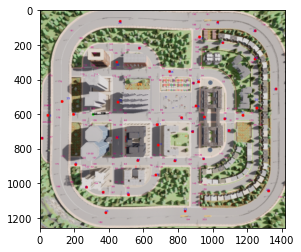

In [ ]:

'''img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(gorder), splitPath=True)

plt.imshow(img[:,:,::-1])



#[20 15 16 11  2 18 27 23 12 13  8 34 25 36  4]
getDensePath (np.array ([36, 13, 27, 15, 23, 25, 34,  2,  4,  8, 11, 12, 16 ,18, 20]))'''

In [140]:
'''
def add(x, y):
    global intersections
    intersections = np.vstack([intersections, [x,y]])
    return


def nothing(y):
    pass



cv2.namedWindow('img')

x=0.0
y=0.0



while True:
    k = cv2.waitKey(1)
    
    if k==ord('w'):
        y+=3
    elif k==ord('s'):
        y+=-3
        
    if k==ord('d'):
        x+=3
    elif k==ord('a'):
        x+=-3
    
    
    imgr = cv2.imread("img.png")
    
    for q,w,_ in givenPoints:
        q,w = traslate(point=(q,w))

        bottomLeftCornerOfText = (q+4,w+4)

        imgr = cv2.circle(imgr, (q, w), 3, (00,255,255), 2)
    

  

    

    myX = int(x)
    myY = int (y)
    
    cv2.line(imgr,   traslate(point = (myX+10,myY)  )         ,     traslate(point = (myX-10,myY)  )     , (0,0,0), 2)
    cv2.line(imgr,  traslate(point = (myX,myY+10)  )         ,     traslate(point = (myX,myY-10)  ) , (0,0,0), 2)

    


    for i,j in intersections:
        imgr = cv2.circle(imgr, traslate (point=(i, j)), 3, (255, 255, 0), 2)

    
    cv2.imshow('img',imgr)

    
    if k==ord('q'):
        break
    elif k==ord('u'):
        add(x,y)

cv2.destroyAllWindows()

np.save("path_waypoints.npy",np.array(intersections))

print(intersections)'''

'\ndef add(x, y):\n    global intersections\n    intersections = np.vstack([intersections, [x,y]])\n    return\n\n\ndef nothing(y):\n    pass\n\n\n\ncv2.namedWindow(\'img\')\n\nx=0.0\ny=0.0\n\n\n\nwhile True:\n    k = cv2.waitKey(1)\n    \n    if k==ord(\'w\'):\n        y+=3\n    elif k==ord(\'s\'):\n        y+=-3\n        \n    if k==ord(\'d\'):\n        x+=3\n    elif k==ord(\'a\'):\n        x+=-3\n    \n    \n    imgr = cv2.imread("img.png")\n    \n    for q,w,_ in givenPoints:\n        q,w = traslate(point=(q,w))\n\n        bottomLeftCornerOfText = (q+4,w+4)\n\n        imgr = cv2.circle(imgr, (q, w), 3, (00,255,255), 2)\n    \n\n  \n\n    \n\n    myX = int(x)\n    myY = int (y)\n    \n    cv2.line(imgr,   traslate(point = (myX+10,myY)  )         ,     traslate(point = (myX-10,myY)  )     , (0,0,0), 2)\n    cv2.line(imgr,  traslate(point = (myX,myY+10)  )         ,     traslate(point = (myX,myY-10)  ) , (0,0,0), 2)\n\n    \n\n\n    for i,j in intersections:\n        imgr = cv2.circl